In [1]:
# # Function to generate all rectangular Dyck paths for a given m x n rectangle
# def rectangular_dyck_paths(m, n):
#     if m == 0 and n == 0:
#         return [[]]
#     if m==0 and n>0:
#         return [['R'] * n]
#     if m>0 and n==0:
#         return [['U'] * m]

#     paths = []
#     if m > 0:
#         # Add a step in the vertical direction and recursively generate the rest of the path
#         for path in rectangular_dyck_paths(m - 1, n):
#             paths.append(['U'] + path)
#     if n > 0 and m < n:
#         # Add a step in the horizontal direction and recursively generate the rest of the path
#         for path in rectangular_dyck_paths(m, n - 1):
#             paths.append(['R'] + path)
    
#     return paths
# Function to generate all rectangular Dyck paths for a given m x n rectangle
# def rectangular_dyck_paths(m, n, memo={}):
#     if (m, n) in memo:
#         return memo[(m, n)]

#     if m == 0 and n == 0:
#         return [[]]
#     if m == 0 and n > 0:
#         return [['R'] * n]
#     if m > 0 and n == 0:
#         return [['U'] * m]

#     paths = []
#     if m > 0:
#         # Add a step in the vertical direction and recursively generate the rest of the path
#         for path in rectangular_dyck_paths(m - 1, n, memo):
#             paths.append(['U'] + path)
#     if n > 0 and m < n:
#         # Add a step in the horizontal direction and recursively generate the rest of the path
#         for path in rectangular_dyck_paths(m, n - 1, memo):
#             paths.append(['R'] + path)
    
#     memo[(m, n)] = paths
#     return paths

# Function to generate all rectangular Dyck paths for a given m x n rectangle
# Function to generate all rectangular Dyck paths for a given m x n rectangle
def rectangular_dyck_paths(m, n):
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    dp[0][0] = 1

    for i in range(1, m + 1):
        dp[i][0] = 1
    for j in range(1, n + 1):
        dp[0][j] = 1

    for i in range(1, m + 1):
        for j in range(1, n + 1):
            dp[i][j] = dp[i - 1][j] + dp[i][j - 1]

    paths = []
    def generate_path(i, j, path):
        if i == 0 and j == 0:
            paths.append(path)
            return
        if i > 0:
            generate_path(i - 1, j, ['U'] + path)
        if j > 0 and i < j:
            generate_path(i, j - 1, ['R'] + path)

    generate_path(m, n, [])
    return paths


# Function to compute the area under a rectangular Dyck path
def path_area(path, m, n):
    area = 0
    vertical_steps = 0
    for step in path:
        if step == 'U':
            vertical_steps += 1
        elif step == 'R':
            area += vertical_steps
    
    return (m*n)/2-area

# Main function to compute average area under Dyck paths for a given rectangle size
def total_dyck_path_area(m, n):
    paths = rectangular_dyck_paths(m, n)
    total_area = 0
    for path in paths:
        total_area += path_area(path, m, n)
    
    return total_area

def average_dyck_path_area(m,n):
    paths = rectangular_dyck_paths(m, n)
    total_area = 0
    for path in paths:
        total_area += path_area(path, m, n)
    return total_area/len(paths)



In [2]:
# Example usage for a 3x3 rectangl
print(rectangular_dyck_paths(3,3))

[['R', 'R', 'R', 'U', 'U', 'U'], ['R', 'R', 'U', 'R', 'U', 'U'], ['R', 'U', 'R', 'R', 'U', 'U'], ['R', 'R', 'U', 'U', 'R', 'U'], ['R', 'U', 'R', 'U', 'R', 'U']]


In [3]:
from sage.combinat.dyck_word import DyckWords

# Function to display Dyck paths
def display_dyck_paths(size, count=3):
    # Get Dyck words of the specified size
    dyck_words = DyckWords(size)
    
    # Iterate over the first few Dyck words and plot them
    for dyck_word in dyck_words[:count]:
        dyck_word.pretty_print()

# Example usage for Dyck paths of size 3
display_dyck_paths(3)


     _
   _| 
 _|  .
|  . .

   ___
  | x 
 _|  .
|  . .

     _
 ___| 
| x  .
|  . .



In [3]:
areas = []
for n in range(9):
    t = total_dyck_path_area(n,2*n)
    areas.append(t)
    print(t)

0
1
12
112
945
7551
58324
440224
3267927


In [5]:
fricas.guess('[1,2,3,5]')

[]

In [5]:
def Y(n,s):
    sum = 0
    for k in range(n+1):
        sum += binomial(s*k,k) * binomial(s*(n-k), n-k)
    return sum

def T(n,s):
    return binomial(s*n,n) / ((s-1)*n+1)

def A(n,s):
    return Y(n+1,s) / 2 - ((2*s - 3)*n +2*s -2) * T(n+1,s) / 2

In [9]:
for n in range(5):
    print(f'{A(n,3)} vs. {explicit_total(n)+4^n}')

1 vs. 1
9 vs. 5
69 vs. 22
502 vs. 93
3564 vs. 386


In [6]:
def explicit_total(n):
    return 4^n - binomial(2*n+1,n)

In [ ]:
for n in range(5):
    print(f'{binomial(2*n+2, n+1)} vs. {binomial(2*n+1,n)}')

In [7]:
def asymp(n, a):
    expr = n^(3/2) * sqrt(2*pi*a*(a+1))/4
    return N(expr.subs({n: n, a: a}))

In [28]:
for n in range(8):
    print(f'{4*N(average_dyck_path_area(n,2*n))} vs {asymp(n,2)}')

0.000000000000000 vs 0.000000000000000
2.00000000000000 vs 1.53499006191973
5.33333333333333 vs 4.34160752734961
9.33333333333333 vs 7.97604232907482
13.7454545454545 vs 12.2799204953579
18.4395604395604 vs 17.1617106161957
23.3389355742297 vs 22.5596544716790
28.3942208462332 vs 28.4284137815667


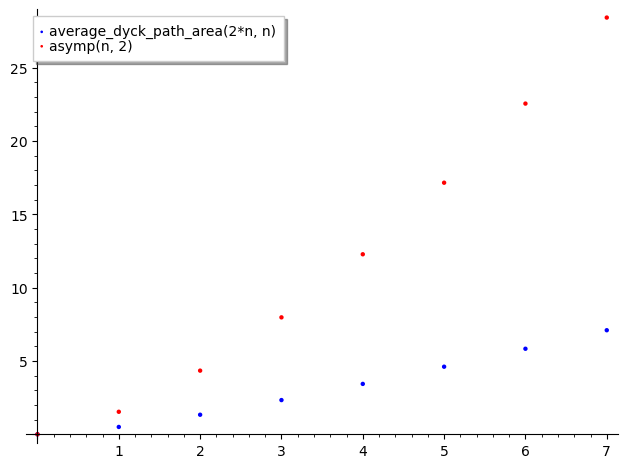

In [8]:
# Create a list of points to plot
points = [(n, N(average_dyck_path_area(n, 2*n))) for n in range(8)]  # Calculate points for average_dyck_path_area
points2 = [(n, N(asymp(n, 2))) for n in range(8)]  # Calculate points for asymp

# Plot the points
p1 = list_plot(points, color='blue', legend_label='average_dyck_path_area(2*n, n)')
p2 = list_plot(points2, color='red', legend_label='asymp(n, 2)')
show(p1 + p2)

In [1]:
# Define the variables
var('k n s')

# Define the function F_{s+1}(n)
def F(s, n):
    return 1/((s+1)*n + 1) * binomial((s+1)*n + 1, n)

# Define the sum expression with the F function included
sum_expression = sum(k * F(s, k) / (n + 1 - k) * binomial((s+1)*(n + 1 - k) - 2, n - k), k, 0, n)

# Display the sum expression
show(sum_expression)


sum(-k*binomial(-(k - n - 1)*s - k + n - 1, -k + n)*binomial(k*s + k + 1, k)/(k^2 - (k + 1)*n + (k^2 - k*n - k)*s - 1), k, 0, n)

In [1]:
# Define the variables
var('n s x')

# Define the nth term of the sequence
r_n = 1/(n+1) * binomial((s+1)*(n+1)-2, n)

# Find the generating function for the sequence
R = sum(r_n * x^n for n in range(20))  # compute the first 20 terms for the example

# Try to find a pattern or closed-form of the generating function
# Note: This is an experimental approach since there might not be a straightforward closed-form
# You may also use the guess() function from Sage, or other pattern recognition methods

show(R)


x^19*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^18*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^17*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^16*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^15*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^14*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^13*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^12*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^11*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^10*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^9*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^8*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^7*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^6*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^5*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^4*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^3*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x^2*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + x*binomial((n + 1)*(s + 1) - 2, n)/(n + 1) + binomial((n + 1)*(s + 1) - 2, n)/(n + 1)

In [2]:
from sage.combinat.guess import find_genfunc

# Define the variables
var('n s x')

# Define the nth term of the sequence
r_n = lambda n: 1/(optionally) extra files to make your life easier, such as a start/stop script(n+1) * binomial((s+1)*(n+1)-2, n)

# Generate a list of the first few terms of the sequence
terms = [r_n(n) for n in range(1, 50)]  # Adjust the range as necessary

# Use the find_genfunc function to guess a generating function
R_guess = find_genfunc(terms, x)

# Show the guessed generating function
show(R_guess)

ModuleNotFoundError: No module named 'sage.combinat.guess'

In [4]:
# Define the necessary variables and functions in SageMath (Python syntax)

s = 9



def sequence_term(n):

    return 1/(n+1) * binomial((s+1)*(n+1)-2, n)



# Compute the first few terms of the sequence

sequence_values = [sequence_term(n) for n in range(10)]  # For n = 0 to 9

sequence_values

[1, 9, 126, 2109, 38916, 763686, 15636192, 330237765, 7141879503, 157366449604]

In [6]:

s = 9



def new_sequence_term(n):

    return s/((s+1)*n+s) * binomial((s+1)*n+s, n)



# Compute the first few terms of the sequence

sequence_values = [new_sequence_term(n) for n in range(10)]  # For n = 0 to 9

sequence_values

[1, 9, 126, 2109, 38916, 763686, 15636192, 330237765, 7141879503, 157366449604]